In [1]:
import numpy as np
import matplotlib.pyplot as plt

## a)

In [2]:
a=0.142e-9
def AGNR_Pos(N, xoff):
    Pos=np.zeros((2*N, 2))
    for i in range(2*N):
        if i % 4 == 0:
            Pos[i, 0] = xoff+a
            Pos[i, 1] = a*np.sqrt(3)/2 * (i // 4)*2
        if i % 4 == 1:
            Pos[i, 0] = xoff+2*a
            Pos[i, 1] = a*np.sqrt(3)/2 * ((i-1) // 4)*2
        if i % 4 == 2:
            Pos[i, 0] = xoff+5*a/2
            Pos[i, 1] = a*np.sqrt(3)/2 * (2*((i-2) // 4)+1)
        if i % 4 == 3:
            Pos[i, 0] = xoff+a/2
            Pos[i, 1] = a*np.sqrt(3)/2 * (2*((i-3) // 4)+1)
    return Pos

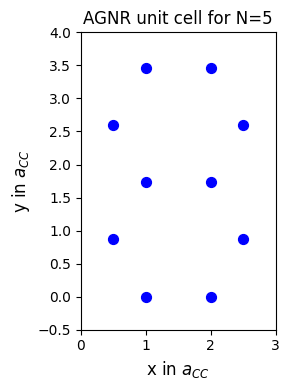

In [3]:
Pos1=AGNR_Pos(5, 0)
import matplotlib.pyplot as plt

# Set figure size (width x height)
plt.figure(figsize=(3, 4))  # Adjust as needed for a narrower look

# Create scatter plot
plt.scatter(Pos1[:, 0]/a, Pos1[:, 1]/a, s=50, color="b")
 # Dashed grid for a subtle effect
plt.xlabel(r"x in $a_{CC}$", fontsize=12)  # Customize labels
plt.ylabel(r"y in $a_{CC}$", fontsize=12)
plt.xlim(0, 3)
plt.ylim(-0.5, 4)
plt.title("AGNR unit cell for N=5")
plt.tight_layout()
plt.savefig("AGNR_Pos_simple.png", dpi=200)
plt.show()

In [4]:
from scipy.spatial.distance import euclidean
def AGNR_Dis(Pos1, Pos2):
    twoN=Pos1.shape[0]
    Dis = np.zeros((twoN, twoN))
    for i in range(twoN):
        for j in range(twoN):
            Dis[i, j] = euclidean(Pos1[i], Pos2[j])
    return Dis

In [5]:
from scipy.constants import eV
t=-2.7*eV

def AGNR_Ham(Dis):
    twoN=Dis.shape[0]
    Ham=np.zeros((twoN, twoN))

    for i in range(twoN):
        for j in range(twoN):
            if Dis[i, j] <= a+a/10 and Dis[i, j]!=0:
                Ham[i, j] = t

    return Ham

In [6]:
N=5
Pos_central=AGNR_Pos(N, 0)
Pos_left=AGNR_Pos(N, -3*a)
Pos_right=AGNR_Pos(N, 3*a)
dist11=AGNR_Dis(Pos_central, Pos_central)
dist10=AGNR_Dis(Pos_central, Pos_left)
dist12=AGNR_Dis(Pos_central, Pos_right)
H_11=AGNR_Ham(dist11)
H_10=AGNR_Ham(dist10)
H_12=AGNR_Ham(dist12)
H_11/eV
np.savetxt("table.csv", H_11/eV, delimiter=",", fmt="%.1f")

In [7]:
(dist11/a).round(2)

array([[0.  , 1.  , 1.73, 1.  , 1.73, 2.  , 3.  , 2.65, 3.46, 3.61],
       [1.  , 0.  , 1.  , 1.73, 2.  , 1.73, 2.65, 3.  , 3.61, 3.46],
       [1.73, 1.  , 0.  , 2.  , 1.73, 1.  , 1.73, 2.65, 3.  , 2.65],
       [1.  , 1.73, 2.  , 0.  , 1.  , 1.73, 2.65, 1.73, 2.65, 3.  ],
       [1.73, 2.  , 1.73, 1.  , 0.  , 1.  , 1.73, 1.  , 1.73, 2.  ],
       [2.  , 1.73, 1.  , 1.73, 1.  , 0.  , 1.  , 1.73, 2.  , 1.73],
       [3.  , 2.65, 1.73, 2.65, 1.73, 1.  , 0.  , 2.  , 1.73, 1.  ],
       [2.65, 3.  , 2.65, 1.73, 1.  , 1.73, 2.  , 0.  , 1.  , 1.73],
       [3.46, 3.61, 3.  , 2.65, 1.73, 2.  , 1.73, 1.  , 0.  , 1.  ],
       [3.61, 3.46, 2.65, 3.  , 2.  , 1.73, 1.  , 1.73, 1.  , 0.  ]])

In [8]:
def AGNR(N, k):
    a1=3*a
    Pos_central=AGNR_Pos(N, 0)
    Pos_left=AGNR_Pos(N, -a1)
    Pos_right=AGNR_Pos(N, a1)
    dist11=AGNR_Dis(Pos_central, Pos_central)
    dist10=AGNR_Dis(Pos_central, Pos_left)
    dist12=AGNR_Dis(Pos_central, Pos_right)
    H_11=AGNR_Ham(dist11)
    H_10=AGNR_Ham(dist10)
    H_12=AGNR_Ham(dist12)

    HAM=np.zeros((N, N, len(k)), dtype=complex)
    k_values=np.zeros((len(k), 2*N))

    for i in range(len(k)):
        phaseShift_10=np.exp(-1j*a1*k[i])
        phaseShift_12=np.exp(1j*a1*k[i])

        HAM=H_11 + phaseShift_10*H_10 + phaseShift_12*H_12

        eigval, eigvec = np.linalg.eigh(HAM)
        k_values[i,:]=eigval[eigval.argsort()]

    return k_values

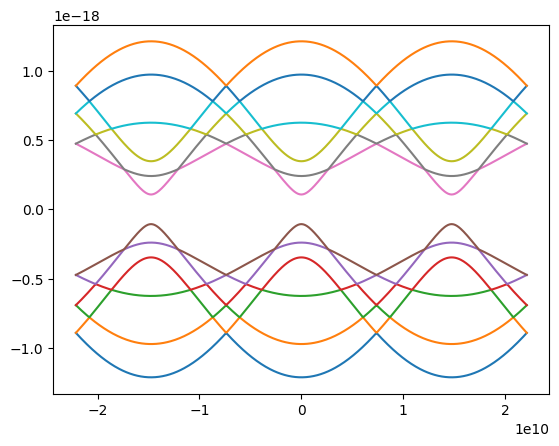

In [9]:
eigenwerte=AGNR(6, np.linspace(-np.pi/a, np.pi/a, 500))
plt.plot(np.linspace(-np.pi/a, np.pi/a, 500), eigenwerte)

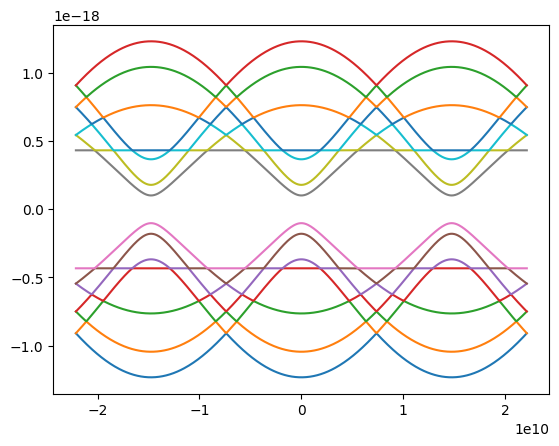

In [10]:
eigenwerte=AGNR(7, np.linspace(-np.pi/a, np.pi/a, 500))
plt.plot(np.linspace(-np.pi/a, np.pi/a, 500), eigenwerte)

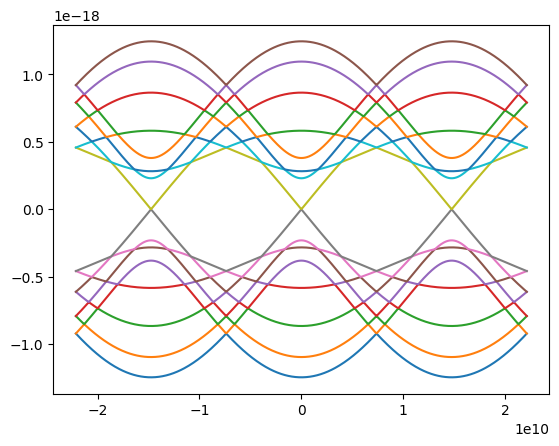

In [11]:
eigenwerte=AGNR(8, np.linspace(-np.pi/a, np.pi/a, 500))
plt.plot(np.linspace(-np.pi/a, np.pi/a, 500), eigenwerte)

In [12]:
def f(E, gamma):
    return gamma/2/np.pi/(E**2 + (gamma/2)**2)

def DOS(E, eigval, gamma):
    dos=np.zeros(eigval.shape[0], dtype=np.float64)
    for i in range(len(E)):
        for j in range(eigval.shape[1]):
            for k in range(eigval.shape[0]):
                dos[i]=dos[i] + f(E[i] - eigval[k, j], gamma)
    dos=dos/(3*a)
    return dos

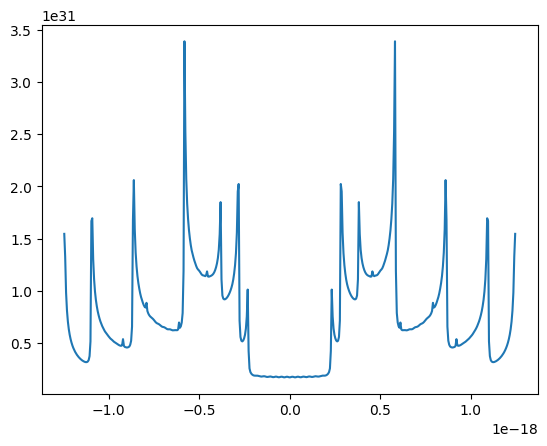

In [13]:
from scipy.constants import k
E=np.linspace(eigenwerte.min(), eigenwerte.max(), 500)
gamma=k*300
density_of_states=DOS(E, eigenwerte, gamma)
plt.plot(E, density_of_states)

C:\Users\andri\AppData\Local\Temp\ipykernel_1116\2685921170.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', eigenwerte.shape[1])  # 'tab20' provides distinct colors


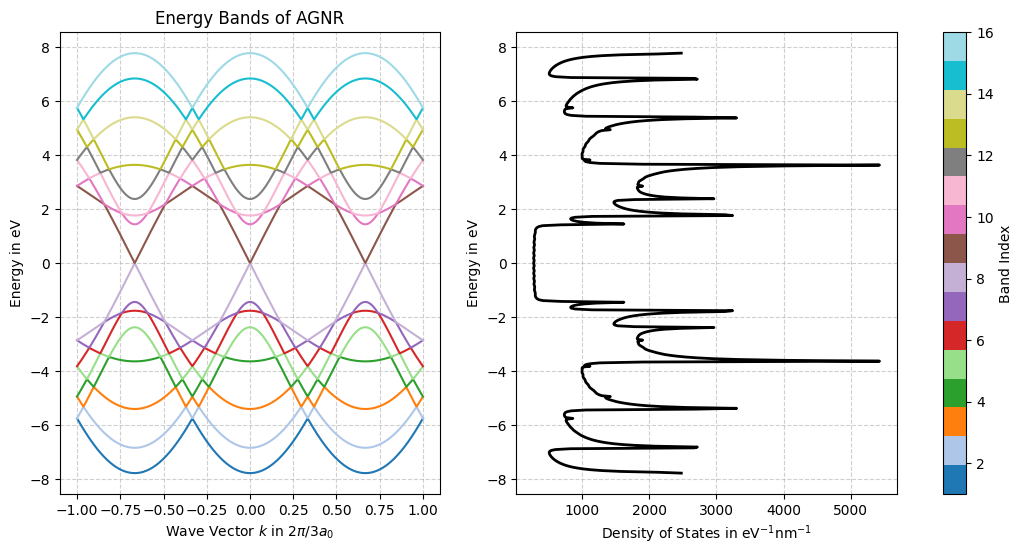

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.constants import k, eV

# Define parameters
kx = np.linspace(-np.pi/a, np.pi/a, 500)
k0=np.pi/a


# Compute eigenvalues (energy bands)
eigenwerte = AGNR(8, kx)  # Ensure AGNR() function is correctly defined
# Compute DOS
E = np.linspace(eigenwerte.min(), eigenwerte.max(), 500)
gamma = k * 300
density_of_states = DOS(E, eigenwerte, gamma)

# Define colormap
fig, ax1 = plt.subplots(1, 2, figsize=(12, 6))
cmap = cm.get_cmap('tab20', eigenwerte.shape[1])  # 'tab20' provides distinct colors
norm = mcolors.Normalize(vmin=1, vmax=eigenwerte.shape[1])  # Normalize for colorbar

# Plot energy bands with well-separated colors
for i in range(eigenwerte.shape[1]):
    color = cmap(i / eigenwerte.shape[1])  # Assign different colors to each band
    ax1[0].plot(kx/k0, eigenwerte[:, i]/eV, color=color, label=f'Band {i+1}', linewidth=1.5)

ax1[0].set_xlabel(r"Wave Vector $k$ in $2\pi/3a_0$")
ax1[0].set_ylabel("Energy in eV")
ax1[0].set_title("Energy Bands of AGNR")
ax1[0].grid(True, linestyle="--", alpha=0.6)

# Create a secondary y-axis for DOS
ax1[1].plot(density_of_states*eV/1e9, E/eV, color='black', linewidth=2)  # DOS plot
ax1[1].set_xlabel(r"Density of States in eV$^{-1}$nm$^{-1}$")
ax1[1].set_ylabel("Energy in eV")
ax1[1].grid(True, linestyle="--", alpha=0.6)

# Add a colorbar to the side
sm = cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a scalar mappable for colormap
sm.set_array([])  # Dummy array for colorbar

cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label("Band Index")



plt.savefig("Energy_bands_N8.png", dpi=300)
plt.show()

C:\Users\andri\AppData\Local\Temp\ipykernel_1116\3591832662.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', eigenwerte.shape[1])  # 'tab20' provides distinct colors


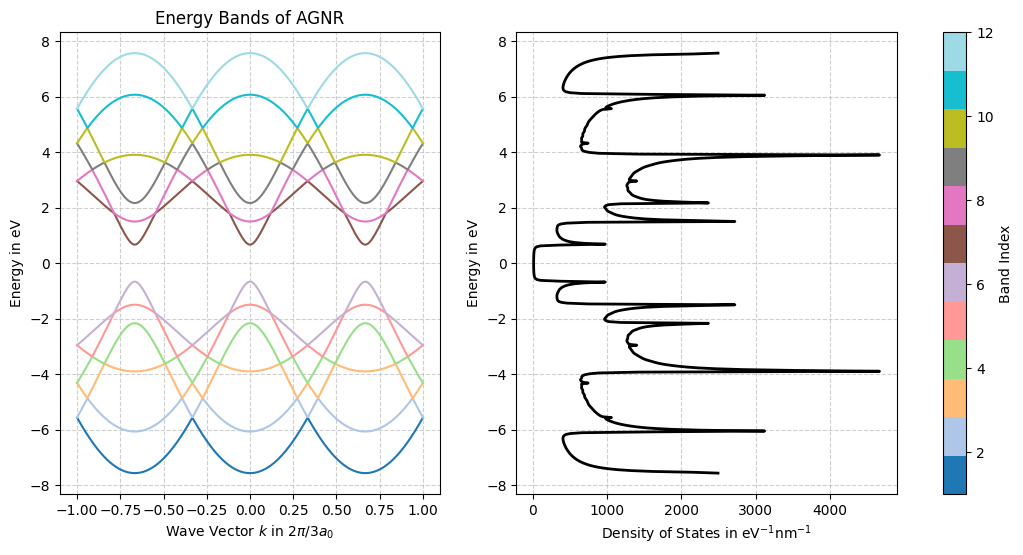

In [24]:
eigenwerte = AGNR(6, kx)  # Ensure AGNR() function is correctly defined
# Compute DOS
E = np.linspace(eigenwerte.min(), eigenwerte.max(), 500)
gamma = k * 300
density_of_states = DOS(E, eigenwerte, gamma)

# Define colormap
fig, ax1 = plt.subplots(1, 2, figsize=(12, 6))
cmap = cm.get_cmap('tab20', eigenwerte.shape[1])  # 'tab20' provides distinct colors
norm = mcolors.Normalize(vmin=1, vmax=eigenwerte.shape[1])  # Normalize for colorbar

# Plot energy bands with well-separated colors
for i in range(eigenwerte.shape[1]):
    color = cmap(i / eigenwerte.shape[1])  # Assign different colors to each band
    ax1[0].plot(kx/k0, eigenwerte[:, i]/eV, color=color, label=f'Band {i+1}', linewidth=1.5)

ax1[0].set_xlabel(r"Wave Vector $k$ in $2\pi/3a_0$")
ax1[0].set_ylabel("Energy in eV")
ax1[0].set_title("Energy Bands of AGNR")
ax1[0].grid(True, linestyle="--", alpha=0.6)

# Create a secondary y-axis for DOS
ax1[1].plot(density_of_states*eV/1e9, E/eV, color='black', linewidth=2)  # DOS plot
ax1[1].set_xlabel(r"Density of States in eV$^{-1}$nm$^{-1}$")
ax1[1].set_ylabel("Energy in eV")
ax1[1].grid(True, linestyle="--", alpha=0.6)

# Add a colorbar to the side
sm = cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a scalar mappable for colormap
sm.set_array([])  # Dummy array for colorbar

cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label("Band Index")



plt.savefig("Energy_bands_N6.png", dpi=300)
plt.show()

C:\Users\andri\AppData\Local\Temp\ipykernel_1116\2495699559.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', eigenwerte.shape[1])  # 'tab20' provides distinct colors


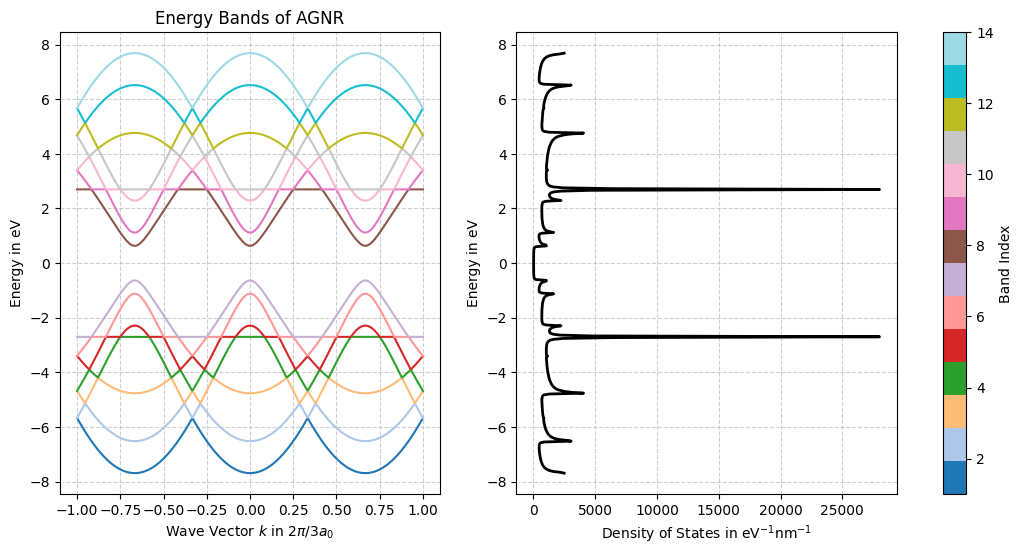

In [25]:
eigenwerte = AGNR(7, kx)  # Ensure AGNR() function is correctly defined
# Compute DOS
E = np.linspace(eigenwerte.min(), eigenwerte.max(), 500)
gamma = k * 300
density_of_states = DOS(E, eigenwerte, gamma)

# Define colormap
fig, ax1 = plt.subplots(1, 2, figsize=(12, 6))
cmap = cm.get_cmap('tab20', eigenwerte.shape[1])  # 'tab20' provides distinct colors
norm = mcolors.Normalize(vmin=1, vmax=eigenwerte.shape[1])  # Normalize for colorbar

# Plot energy bands with well-separated colors
for i in range(eigenwerte.shape[1]):
    color = cmap(i / eigenwerte.shape[1])  # Assign different colors to each band
    ax1[0].plot(kx/k0, eigenwerte[:, i]/eV, color=color, label=f'Band {i+1}', linewidth=1.5)

ax1[0].set_xlabel(r"Wave Vector $k$ in $2\pi/3a_0$")
ax1[0].set_ylabel("Energy in eV")
ax1[0].set_title("Energy Bands of AGNR")
ax1[0].grid(True, linestyle="--", alpha=0.6)

# Create a secondary y-axis for DOS
ax1[1].plot(density_of_states*eV/1e9, E/eV, color='black', linewidth=2)  # DOS plot
ax1[1].set_xlabel(r"Density of States in eV$^{-1}$nm$^{-1}$")
ax1[1].set_ylabel("Energy in eV")
ax1[1].grid(True, linestyle="--", alpha=0.6)

# Add a colorbar to the side
sm = cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a scalar mappable for colormap
sm.set_array([])  # Dummy array for colorbar

cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label("Band Index")



plt.savefig("Energy_bands_N7.png", dpi=300)
plt.show()